In [ ]:
import numpy as np



<h1> Single Neuron with 4 inputs

In [ ]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
b = 2 
outputs = 0
for i in range(len(inputs)):
  outputs = outputs + (inputs[i]*weights[i])
outputs = outputs + b
outputs

4.8

<h2> 3 Neurons with 4 inputs </h2>

In [ ]:
inputs = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5
outputs = []
neurons = 3
dictionary = {'weights1' : weights1,'weights2' : weights2, 'weights3' : weights3, 'bias1' : 2, 'bias2' : 3, 'bias3' : 0.5}
for i in range(neurons):
  weights = dictionary.get('weights'+str(i+1))
  bias = dictionary.get('bias' + str(i+1))
  sum = 0
  for value in range(len(inputs)):
    sum = sum + (inputs[value]*weights[value])
      
  outputs.append(sum+bias)
print(outputs)

[4.8, 1.21, 2.385]


In [ ]:
weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]
inputs = [1, 2, 3, 2.5]
biases = [2, 3, 0.5]
output = []
for neuron_weights,neuron_biases in zip(weights,biases):
  sum = 0
  for input,weight in zip(inputs,neuron_weights):
    sum += input*weight
  sum += neuron_biases
  output.append(sum)
output

[4.8, 1.21, 2.385]

<h2> Single neuron using Numpy </h2>

In [ ]:
import numpy as np
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0
output = np.dot(inputs,weights) + bias
output

4.8

<h2> A Layer of Neurons with NumPy </h2>

In [ ]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

output = np.dot(weights,inputs) + biases
output

array([4.8  , 1.21 , 2.385])

<h2> A layer of Neurons with batches of input </h2>

In [ ]:
inputs = [[1.0, 2.0, 3.0, 2.5],
 [2.0, 5.0, -1.0, 2.0],
 [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

outputs = np.dot(inputs,np.array(weights).T) + biases
outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

<h2> Addition of layer </h2>

In [ ]:
inputs = [[1.0, 2.0, 3.0, 2.5],
 [2.0, 5.0, -1.0, 2.0],
 [-1.5, 2.7, 3.3, -0.8]]
weights1 = [[0.2, 0.8, -0.5, 1.0],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]
biases1 = [2.0, 3.0, 0.5]

weights2 = [[0.1, -0.14, 0.5],
 [-0.5, 0.12, -0.33],
 [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_output = np.dot(inputs,np.array(weights1).T) + biases1
layer2_output = np.dot(layer1_output,np.array(weights2).T) + biases2
layer2_output

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

In [5]:
!pip install nnfs

<h2> Dense layer </h2>

In [6]:
from nnfs.datasets import spiral_data
import nnfs
import matplotlib.pyplot as plt

nnfs.init()

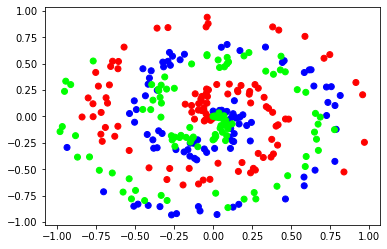

In [ ]:
X,y = spiral_data(100,3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show()

In [ ]:
a = np.random.randn(2,3)
a

array([[-1.3065269 ,  1.6581306 , -0.11816405],
       [-0.6801782 ,  0.6663831 , -0.4607198 ]], dtype=float32)

In [ ]:
nnfs.init()
class Dense:
  def __init__(self,n_inputs,n_neurons):
    self.weights = 0.01*np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1,n_neurons))

  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.biases

X,y = spiral_data(100,3)

dense1 = Dense(2,3)
dense1.forward(X)

print(dense1.output[:5])


[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


<h2> Relu Activation </h2>

In [ ]:
class Activation_Relu:
  def forward(self,inputs):
    self.output =  np.maximum(0,inputs)


In [ ]:
activation = Activation_Relu()

activation.forward(dense1.output)

activation.output[:5]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.00011395, 0.        ],
       [0.        , 0.00031729, 0.        ],
       [0.        , 0.00052666, 0.        ],
       [0.        , 0.00071401, 0.        ]], dtype=float32)

<h2> Softmax activation </h2>

In [ ]:
class SoftMax:
  def forward(self,inputs):
    exp = np.exp(inputs - np.max(inputs,axis=1,keepdims=True)) # subtracting values with maximum values of that particular row in order to solve problem of exploding gradient and dead neuron

    probabilities = exp / np.sum(exp,axis=1,keepdims=True)
    self.output = probabilities


In [ ]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2,3)

activation1 = Activation_Relu()

dense2 = Dense(3,3)

activation2 = SoftMax()

dense1.forward(X)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

activation2.forward(dense2.output)

activation2.output.shape

(300, 3)

<h1> Loss function </h1>
  

<h2> Cross entropy </h2>

In [ ]:
# An example output from the output layer of the neural network
softmax_output = [0.7, 0.1, 0.2]
# Ground truth
target_output = [1, 0, 0]

output = -(np.log(softmax_output[0])*target_output[0] + np.log(softmax_output[1])*target_output[1] + np.log(softmax_output[2])*target_output[2])
output

0.35667494393873245

In [ ]:
softmax_outputs = [[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]]
class_targets = [0, 1, 1]

for target_idx,output in zip(class_targets,softmax_outputs):
  print(output[target_idx])

0.7
0.5
0.9


In [ ]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]

In [ ]:
softmax_outputs[[0,1,2],class_targets]

array([0.7, 0.5, 0.9])

In [ ]:
res = -np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])
np.mean(res)

0.38506088005216804

In [ ]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]])

In [ ]:
class Loss:

  def calculate(self,outputs,y):

    loss = self.forward(outputs,y)
    
    mean_loss = np.mean(loss)

    return mean_loss

In [ ]:
class Categorical_Crossentropy(Loss):

  # class to compute categorical cross entropy loss

  def forward(self,y_pred,y_true):
    
    samples = len(y_pred)

    
    y_pred = np.clip(y_pred,1e-7,1 - 1e-7)

    if len(y_true.shape) == 1:
      # if targets are not one hot encoded i.e targets are in the form of [target_of_sample1,target_of_sample2]
      y_pred = y_pred[range(samples),y_true]

    elif len(y_true.shape) == 2:

      # if targets are one hot encoded i.e targets are of the shape (n_samples,n_targets) i.e [[1,0,0]]

      y_pred = np.sum(y_pred * y_true,axis=1)

    res = -np.log(y_pred)

    return res

In [ ]:
loss = Categorical_Crossentropy()

loss.calculate(softmax_outputs,class_targets)

0.38506088005216804

<h2> Combining everything till this point </h2>

In [ ]:
class Dense:

  def __init__(self,n_samples,n_neurons):
    self.weights = 0.01 * np.random.randn(n_samples,n_neurons)
    self.biases = np.zeros((1,n_neurons))

  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.biases

class ActivationRelu:

  def forward(self,inputs):
    self.output = np.maximum(0,inputs)

class ActivationSoftmax:

  def forward(self,inputs):
    # inputs = (n_samples,n_classes)
    exp = np.exp(inputs - np.max(inputs,axis=1,keepdims=True)) # subtracting with largets of inputs in order to solve problem of exploding gradient for example np.exp(10000) 

    self.output = exp / np.sum(exp,axis=1,keepdims=True) # row wise sum for each sample output shape will be output = (n_samples,n_classes)

    return self.output



class Loss:

  def calculate(self,outputs,y):

    loss_value = self.forward(outputs,y)

    mean_value = np.mean(loss_value)
  
    return mean_value

class Categorical_Crossentropy(Loss):

  def forward(self,y_pred,y_true):
    samples = len(y_pred) 

    y_pred = np.clip(y_pred,1e-7, 1 - 1e-7)

    if len(y_true.shape) == 1:
      y_pred  = y_pred[range(samples),y_true]

    elif len(y_true.shape) == 2:
      y_pred = np.sum(y_pred*y_true,axis=1)

    probabilities = -np.log(y_pred)
    return probabilities

In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2,3)

dense1.forward(X)

activation1 = ActivationRelu()

activation1.forward(dense1.output)

dense2 = Dense(3,3)

dense2.forward(activation1.output)

activation2 = ActivationSoftmax()

activation2.forward(dense2.output)

print(activation2.output[:5])

loss = Categorical_Crossentropy()

loss.calculate(activation2.output,y)


predictions = np.argmax(activation2.output,axis=1)


if len(y.shape) == 2:
  y = np.argmax(y,axis=1)
acc = np.mean(predictions==y) 
print(acc)

[[0.33333334 0.33333334 0.33333334]
 [0.33333412 0.3333327  0.33333313]
 [0.33333495 0.333332   0.33333302]
 [0.3333358  0.3333313  0.33333293]
 [0.33333617 0.33333114 0.3333327 ]]
0.31


<h2> Accuracy Calculation </h2>

In [ ]:
softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.5, 0.1, 0.4],
 [0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])

np.mean(np.argmax(softmax_outputs,axis=1) == class_targets)

0.6666666666666666

In [ ]:
import matplotlib.pyplot as plt


<h2> Back propagation </h2>

In [ ]:
import numpy as np

dvalues = np.array([[1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]])

inputs = np.array([[1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]])

weights = np.array([[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]).T


biases = np.array([[2, 3, 0.5]])


layer_outputs = np.dot(inputs,weights) + biases
relu_outputs = np.maximum(0,layer_outputs)


drelu = dvalues.copy()
drelu[relu_outputs <= 0] = 0

dweights = np.dot(inputs.T,drelu)

dinputs = np.dot(drelu,weights.T)



In [ ]:
class Dense:

  def __init__(self,n_samples,n_neurons):
    self.weights = 0.01 * np.random.randn(n_samples,n_neurons)
    self.biases = np.zeros((1,n_neurons))
    

  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.biases
    self.inputs = inputs

  def backward(self,dvalues):

    self.dweights = np.dot(self.inputs.T,dvalues)
    self.dbiases = np.sum(dvalues,axis=0,keepdims=True)
    self.dinputs = np.dot(dvalues, self.weights.T)

class ActivationRelu:

  def forward(self,inputs):
    self.output = np.maximum(0,inputs)
    self.inputs = inputs
  
  def backward(self,dvalues):

    self.drelu = dvalues.copy()
    self.drelu[self.inputs<=0] = 0


class ActivationSoftmax:


  def forward(self,inputs):
    
    exp = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))

    

    self.output = exp / np.sum(exp,axis=1,keepdims=True) # row wise sum for each sample output shape will be output = (n_samples,n_classes)



class Loss:

  def calculate(self,outputs,y):

    self.forward(outputs,y)

    loss_value = self.probabilities

    mean_value = np.mean(loss_value)
  
    return mean_value

class Categorical_Crossentropy(Loss):

  def forward(self,y_pred,y_true):
    samples = len(y_pred) 

    y_pred = np.clip(y_pred,1e-7, 1 - 1e-7)

    if len(y_true.shape) == 1:
      y_pred  = y_pred[range(samples),y_true]

    elif len(y_true.shape) == 2:
      y_pred = np.sum(y_pred*y_true,axis=1)

    self.probabilities = -np.log(y_pred)


class Softmax_Activation_Crossentropy:

  def __init__(self):
    self.activation = ActivationSoftmax()
    self.loss = Categorical_Crossentropy()
  
  def forward(self,inputs,y_true):

    self.activation.forward(inputs)
    
    self.output = self.activation.output

    
    return self.loss.calculate(self.output,y_true)


  def backward(self,dvalues,y_true):

    samples = len(dvalues)

    if len(y_true.shape) == 2:
      y_true = np.argmax(y_true,axis=1)

    self.dinputs = dvalues.copy()
    # derivative of softmax is y_i_j - y_hat_i_j
    self.dinputs[range(samples),y_true] -= 1

    self.dinputs = self.dinputs / samples

    


In [ ]:

X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2,3)

activation1 = ActivationRelu()

dense2 = Dense(3,3)


activation2 = Softmax_Activation_Crossentropy()

dense1.forward(X)

print(dense1.output[:5])

activation1.forward(dense1.output)

dense2.forward(activation1.output)


loss = activation2.forward(dense2.output,y)
print(loss)

prediction = np.argmax(activation2.output,axis=1)

accuracy = np.mean(prediction == y)


print(accuracy)

activation2.backward(activation2.output,y)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.drelu)

activation2.dinputs[:5]

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.3171324e-05  1.5636622e-04 -3.7923790e-05]
 [-2.5519877e-04  4.5124092e-04  4.4624896e-05]
 [-3.2183601e-04  7.0533255e-04  2.9260027e-05]
 [-1.5462888e-04  8.3128718e-04 -8.3571489e-05]]
1.098608
0.35


array([[-0.00222222,  0.00111111,  0.00111111],
       [-0.00222222,  0.00111111,  0.00111111],
       [-0.00222222,  0.00111111,  0.00111111],
       [-0.00222222,  0.00111111,  0.00111111],
       [-0.00222222,  0.00111112,  0.0011111 ]], dtype=float32)

<h2> Optimizers </h2>

In [ ]:
# SGD optimizers
class SGD:

  def __init__(self,learning_rate=1,rate_decay=0.):
    self.learning_rate = learning_rate
    self.rate_decay = rate_decay
    self.iterations = 0
    self.current_learning_rate = learning_rate

  

  def update_learning_rate(self):

    if self.rate_decay:
      self.current_learning_rate = self.learning_rate * (1. / (1. + self.rate_decay * self.iterations))



  def update_params(self,layer):
    layer.weights -= self.current_learning_rate*layer.dweights
    layer.biases -= self.current_learning_rate*layer.dbiases
  
  def update_iterations(self):
    self.iterations += 1



In [ ]:
class SGD_Momentum:
  
  def __init__(self,learning_rate=1,rate_decay=0.,momentum = 0.):
    self.learning_rate = learning_rate
    self.rate_decay = rate_decay
    self.iterations = 0
    self.current_learning_rate = learning_rate
    self.momentum = momentum

  def update_learning_rate(self):

    if self.rate_decay:
      self.current_learning_rate = self.learning_rate * (1. / (1. + self.rate_decay * self.iterations))

  def update_params(self,layer):
    if self.momentum:
      if not hasattr(layer,'weight_momentum'):
        layer.weight_momentum = np.zeros_like(layer.weights)

        layer.bias_momentum = np.zeros_like(layer.biases)

      weight_updates = self.momentum * layer.weight_momentum - self.current_learning_rate * layer.dweights
      biases_updates = self.momentum * layer.bias_momentum - self.current_learning_rate * layer.dbiases
      layer.weight_momentum = weight_updates
      layer.bias_momentum - biases_updates
    else:
      weight_updates -= self.current_learning_rate * layer.dweights
      biases_updates -= self.current_learning_rate * layer.dbiases

    layer.weights += weight_updates
    layer.biases += biases_updates

  def update_iterations(self):
    self.iterations += 1

In [ ]:

X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2,64)

activation1 = ActivationRelu()

dense2 = Dense(64,3)

activation2 = Softmax_Activation_Crossentropy()

optimizers = SGD(rate_decay=1e-3)
for epoch in range(20001):
  dense1.forward(X)

  activation1.forward(dense1.output)

  dense2.forward(activation1.output)

  loss = activation2.forward(dense2.output,y)

  prediction = np.argmax(activation2.output,axis=1)

  acc = np.mean(prediction==y)

  if not epoch % 100 :
    print('epoch is {},loss is {} and acc is {}, learning_Rate is {}'.format(epoch,loss,acc,optimizers.current_learning_rate))

  activation2.backward(activation2.output,y)

  dense2.backward(activation2.dinputs)

  activation1.backward(dense2.dinputs)

  dense1.backward(activation1.drelu)

  optimizers.update_learning_rate()
  optimizers.update_params(dense1)
  optimizers.update_params(dense2)
  optimizers.update_iterations()


epoch is 0,loss is 1.098588228225708 and acc is 0.3433333333333333, learning_Rate is 1
epoch is 100,loss is 1.0895360708236694 and acc is 0.4066666666666667, learning_Rate is 0.9099181073703367
epoch is 200,loss is 1.0785685777664185 and acc is 0.4066666666666667, learning_Rate is 0.8340283569641367
epoch is 300,loss is 1.076603651046753 and acc is 0.41, learning_Rate is 0.7698229407236336
epoch is 400,loss is 1.0759880542755127 and acc is 0.4066666666666667, learning_Rate is 0.7147962830593281
epoch is 500,loss is 1.0752710103988647 and acc is 0.4033333333333333, learning_Rate is 0.66711140760507
epoch is 600,loss is 1.0739953517913818 and acc is 0.41, learning_Rate is 0.6253908692933083
epoch is 700,loss is 1.072247862815857 and acc is 0.4166666666666667, learning_Rate is 0.5885815185403178
epoch is 800,loss is 1.0700596570968628 and acc is 0.42, learning_Rate is 0.5558643690939411
epoch is 900,loss is 1.0678051710128784 and acc is 0.4266666666666667, learning_Rate is 0.5265929436545

In [ ]:

X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2,64)

activation1 = ActivationRelu()

dense2 = Dense(64,3)

activation2 = Softmax_Activation_Crossentropy()

optimizers = SGD_Momentum(rate_decay=1e-3,momentum=0.5)
for epoch in range(20001):
  dense1.forward(X)

  activation1.forward(dense1.output)

  dense2.forward(activation1.output)

  loss = activation2.forward(dense2.output,y)

  prediction = np.argmax(activation2.output,axis=1)

  acc = np.mean(prediction==y)

  if not epoch % 100 :
    print('epoch is {},loss is {} and acc is {}, learning_Rate is {}'.format(epoch,loss,acc,optimizers.current_learning_rate))

  activation2.backward(activation2.output,y)

  dense2.backward(activation2.dinputs)

  activation1.backward(dense2.dinputs)

  dense1.backward(activation1.drelu)

  optimizers.update_learning_rate()
  optimizers.update_params(dense1)
  optimizers.update_params(dense2)
  optimizers.update_iterations()


epoch is 0,loss is 1.0985819101333618 and acc is 0.36666666666666664, learning_Rate is 1
epoch is 100,loss is 1.0722851753234863 and acc is 0.43666666666666665, learning_Rate is 0.9099181073703367
epoch is 200,loss is 1.0700246095657349 and acc is 0.41333333333333333, learning_Rate is 0.8340283569641367
epoch is 300,loss is 1.0694432258605957 and acc is 0.41, learning_Rate is 0.7698229407236336
epoch is 400,loss is 1.0681352615356445 and acc is 0.41, learning_Rate is 0.7147962830593281
epoch is 500,loss is 1.0644092559814453 and acc is 0.41, learning_Rate is 0.66711140760507
epoch is 600,loss is 1.0551961660385132 and acc is 0.4066666666666667, learning_Rate is 0.6253908692933083
epoch is 700,loss is 1.0403854846954346 and acc is 0.4066666666666667, learning_Rate is 0.5885815185403178
epoch is 800,loss is 1.0252550840377808 and acc is 0.42, learning_Rate is 0.5558643690939411
epoch is 900,loss is 1.008949637413025 and acc is 0.43666666666666665, learning_Rate is 0.526592943654555
epoch

In [ ]:
class ADAGRAD:

  def __init__(self,learning_rate=1,rate_decay=0.,epsilon=1e-7):
    self.learning_rate = learning_rate
    self.rate_decay = rate_decay
    self.epsilon = epsilon
    self.iterations = 0
    self.current_learning_rate = learning_rate

  def update_learning_rate(self):
    self.current_learning_rate = self.learning_rate * (1. / (1. + self.rate_decay * self.iterations))

  def update_params(self,layer):
    if not hasattr(layer,'previous_weights'):
      layer.previous_weights = np.zeros_like(layer.weights)
      layer.previous_biases = np.zeros_like(layer.biases)
    
  
    layer.previous_weights += layer.dweights ** 2
    layer.previous_biases += layer.dbiases ** 2

    layer.weights -= self.current_learning_rate * layer.dweights / (np.sqrt(layer.previous_weights) + self.epsilon)
    layer.biases -= self.current_learning_rate * layer.dbiases / (np.sqrt(layer.previous_biases) + self.epsilon)

  def update_iterations(self):
    self.iterations  += 1

In [ ]:

X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2,64)

activation1 = ActivationRelu()

dense2 = Dense(64,3)

activation2 = Softmax_Activation_Crossentropy()

optimizers = ADAGRAD(learning_rate = 1,rate_decay=1e-4)
for epoch in range(10001):
  dense1.forward(X)

  activation1.forward(dense1.output)

  dense2.forward(activation1.output)

  loss = activation2.forward(dense2.output,y)

  prediction = np.argmax(activation2.output,axis=1)

  acc = np.mean(prediction==y)

  if not epoch % 500 :
    print('epoch is {},loss is {} and acc is {}, learning_Rate is {}'.format(epoch,loss,acc,optimizers.current_learning_rate))

  activation2.backward(activation2.output,y)

  dense2.backward(activation2.dinputs)

  activation1.backward(dense2.dinputs)

  dense1.backward(activation1.drelu)

  optimizers.update_learning_rate()
  optimizers.update_params(dense1)
  optimizers.update_params(dense2)
  optimizers.update_iterations()


epoch is 0,loss is 1.0986255407333374 and acc is 0.2733333333333333, learning_Rate is 1
epoch is 500,loss is 0.9134111404418945 and acc is 0.51, learning_Rate is 0.9524716639679969
epoch is 1000,loss is 0.8481355905532837 and acc is 0.5266666666666666, learning_Rate is 0.9091735612328392
epoch is 1500,loss is 0.8075557351112366 and acc is 0.57, learning_Rate is 0.8696408383337683
epoch is 2000,loss is 0.777934730052948 and acc is 0.6066666666666667, learning_Rate is 0.8334027835652972
epoch is 2500,loss is 0.7559630274772644 and acc is 0.6266666666666667, learning_Rate is 0.8000640051204096
epoch is 3000,loss is 0.7528643012046814 and acc is 0.5766666666666667, learning_Rate is 0.7692899453804138
epoch is 3500,loss is 0.7370365262031555 and acc is 0.6233333333333333, learning_Rate is 0.7407956144899621
epoch is 4000,loss is 0.7250846028327942 and acc is 0.6166666666666667, learning_Rate is 0.7143367383384527
epoch is 4500,loss is 0.7149375677108765 and acc is 0.6333333333333333, learni

In [8]:
class ADAM:

  def __init__(self,learning_rate=0.01,decay_rate=0.,epsilon=1e-7,beta1=0.9,beta2=0.999):
    self.learning_rate = learning_rate
    self.decay_rate = decay_rate
    self.epsilon = epsilon 
    self.beta1 = beta1
    self.beta2 = beta2
    self.iterations = 0
    self.current_learning_rate = learning_rate

  def update_learning_rate(self):

    self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay_rate * self.iterations))

  def update_params(self,layer):
    if not hasattr(layer,'previous_weights'):
      layer.previous_weights = np.zeros_like(layer.weights)
      layer.previous_biases = np.zeros_like(layer.biases)
      layer.weight_momentums = np.zeros_like(layer.weights)
      layer.bias_momentums = np.zeros_like(layer.biases)

    layer.weight_momentums = self.beta1 * layer.weight_momentums + (1-self.beta1) * layer.dweights
    layer.bias_momentums = self.beta1 * layer.bias_momentums + (1 -self.beta1) * layer.dbiases
    
    weight_momentums_hat = layer.weight_momentums / ( 1 - self.beta1 ** (self.iterations + 1))
    bias_momentums_hat = layer.bias_momentums / ( 1 - self.beta1 ** (self.iterations + 1))

    layer.previous_weights = self.beta2 * layer.previous_weights + (1 - self.beta2) * layer.dweights ** 2
    layer.previous_biases = self.beta2 * layer.previous_biases + (1 - self.beta2) * layer.dbiases ** 2

    previous_weights_hat = layer.previous_weights / ( 1 - self.beta2 ** (self.iterations + 1))
    previous_biases_hat = layer.previous_biases / ( 1 - self.beta2 ** (self.iterations + 1))

    layer.weights -= self.current_learning_rate * weight_momentums_hat / (np.sqrt(previous_weights_hat) + self.epsilon)
    layer.biases -= self.current_learning_rate * bias_momentums_hat / (np.sqrt(previous_biases_hat) + self.epsilon)


  def update_iterations(self):
    self.iterations += 1




In [ ]:

X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2,64)

activation1 = ActivationRelu()

dense2 = Dense(64,3)

activation2 = Softmax_Activation_Crossentropy()

optimizers = ADAM(learning_rate=0.02,decay_rate=1e-5)
for epoch in range(10001):
  dense1.forward(X)

  activation1.forward(dense1.output)

  dense2.forward(activation1.output)

  loss = activation2.forward(dense2.output,y)

  prediction = np.argmax(activation2.output,axis=1)

  acc = np.mean(prediction==y)

  if not epoch % 500 :
    print('epoch is {},loss is {} and acc is {}, learning_Rate is {}'.format(epoch,loss,acc,optimizers.current_learning_rate))

  activation2.backward(activation2.output,y)

  dense2.backward(activation2.dinputs)

  activation1.backward(dense2.dinputs)

  dense1.backward(activation1.drelu)

  optimizers.update_learning_rate()
  optimizers.update_params(dense1)
  optimizers.update_params(dense2)
  optimizers.update_iterations()


epoch is 0,loss is 1.0985994338989258 and acc is 0.31333333333333335, learning_Rate is 0.02
epoch is 500,loss is 0.5556354522705078 and acc is 0.7533333333333333, learning_Rate is 0.01990069552930875
epoch is 1000,loss is 0.5088706612586975 and acc is 0.78, learning_Rate is 0.019802176259170884
epoch is 1500,loss is 0.48465219140052795 and acc is 0.7866666666666666, learning_Rate is 0.019704627631799327
epoch is 2000,loss is 0.473643958568573 and acc is 0.79, learning_Rate is 0.019608035372895814
epoch is 2500,loss is 0.46621784567832947 and acc is 0.79, learning_Rate is 0.019512385486687673
epoch is 3000,loss is 0.46129754185676575 and acc is 0.7833333333333333, learning_Rate is 0.01941766424916747
epoch is 3500,loss is 0.4574313759803772 and acc is 0.7966666666666666, learning_Rate is 0.019323858201528515
epoch is 4000,loss is 0.45426371693611145 and acc is 0.7966666666666666, learning_Rate is 0.019230954143789846
epoch is 4500,loss is 0.4529135525226593 and acc is 0.7933333333333333

In [ ]:

X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2,64)

activation1 = ActivationRelu()

dense2 = Dense(64,3)

activation2 = Softmax_Activation_Crossentropy()

optimizers = ADAM(learning_rate=0.05,decay_rate=5e-7)
for epoch in range(10001):
  dense1.forward(X)

  activation1.forward(dense1.output)

  dense2.forward(activation1.output)

  loss = activation2.forward(dense2.output,y)

  prediction = np.argmax(activation2.output,axis=1)

  acc = np.mean(prediction==y)

  if not epoch % 500 :
    print('epoch is {},loss is {} and acc is {}, learning_Rate is {}'.format(epoch,loss,acc,optimizers.current_learning_rate))

  activation2.backward(activation2.output,y)

  dense2.backward(activation2.dinputs)

  activation1.backward(dense2.dinputs)

  dense1.backward(activation1.drelu)

  optimizers.update_learning_rate()
  optimizers.update_params(dense1)
  optimizers.update_params(dense2)
  optimizers.update_iterations()


epoch is 0,loss is 1.0985811948776245 and acc is 0.35333333333333333, learning_Rate is 0.05
epoch is 500,loss is 0.3052339255809784 and acc is 0.89, learning_Rate is 0.049987528111736124
epoch is 1000,loss is 0.22664718329906464 and acc is 0.9133333333333333, learning_Rate is 0.049975037468784345
epoch is 1500,loss is 0.2003358006477356 and acc is 0.9133333333333333, learning_Rate is 0.04996255306647668
epoch is 2000,loss is 0.1966646909713745 and acc is 0.9166666666666666, learning_Rate is 0.04995007490013731
epoch is 2500,loss is 0.17819903790950775 and acc is 0.9233333333333333, learning_Rate is 0.04993760296509512
epoch is 3000,loss is 0.1651885211467743 and acc is 0.93, learning_Rate is 0.049925137256683606
epoch is 3500,loss is 0.15123620629310608 and acc is 0.94, learning_Rate is 0.049912677770240964
epoch is 4000,loss is 0.14774049818515778 and acc is 0.9366666666666666, learning_Rate is 0.049900224501110035
epoch is 4500,loss is 0.13810968399047852 and acc is 0.946666666666666

<h2> L1 and L2 regularizers </h2>

In [2]:
class Dense:

  def __init__(self,n_samples,n_neurons,weight_regularizer_l2=0,bias_regularizer_l2=0,weight_regularizer_l1=0,bias_regularizer_l1=0):
    self.weights = 0.01 * np.random.randn(n_samples,n_neurons)
    self.biases = np.zeros((1,n_neurons))
    self.weight_regularizer_l2 = weight_regularizer_l2
    self.bias_regularizer_l2 = bias_regularizer_l2
    self.weight_regularizer_l1 = weight_regularizer_l1
    self.bias_regularizer_l1 = bias_regularizer_l1
    

  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.biases
    self.inputs = inputs

  def backward(self,dvalues):

    self.dweights = np.dot(self.inputs.T,dvalues)
    self.dbiases = np.sum(dvalues,axis=0,keepdims=True)
    self.dinputs = np.dot(dvalues, self.weights.T)

    # gradients for l2 or l1 regularizer if used 

    if self.weight_regularizer_l2 > 0 :
      res = 2 * self.weight_regularizer_l2 * self.weights
      self.dweights += res
    if self.bias_regularizer_l2 > 0 :
      res = 2 * self.bias_regularizer_l2 * self.biases 
      self.dbiases += res
    if self.weight_regularizer_l1 > 0:
      temp = np.ones_like(self.weights)
      temp[self.weights < 0] = -1
      self.dweights += self.weight_regularizer_l1 * temp
    if self.bias_regularizer_l1 > 0:
      temp = np.ones_like(self.biases)
      temp[self.biases < 0 ] = -1
      self.dbiases += self.bias_regularizer_l1 * temp

class ActivationRelu:

  def forward(self,inputs):
    self.output = np.maximum(0,inputs)
    self.inputs = inputs
  
  def backward(self,dvalues):

    self.drelu = dvalues.copy()
    self.drelu[self.inputs<=0] = 0


class ActivationSoftmax:


  def forward(self,inputs):
    
    exp = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))

    

    self.output = exp / np.sum(exp,axis=1,keepdims=True) # row wise sum for each sample output shape will be output = (n_samples,n_classes)



class Loss:

  def regularizer_loss(self,layer):

    regularize_loss = 0

    if layer.weight_regularizer_l2 > 0:
      regularize_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

    if layer.bias_regularizer_l2 > 0:
      regularize_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

    if layer.weight_regularizer_l1 > 0:
      regularize_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

    if layer.bias_regularizer_l1 > 0:
      regularize_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))


    return regularize_loss


  def calculate(self,outputs,y):

    

    loss_value = self.forward(outputs,y)

    mean_value = np.mean(loss_value)
  
    return mean_value

class Categorical_Crossentropy(Loss):

  def forward(self,y_pred,y_true):
    samples = len(y_pred) 

    y_pred = np.clip(y_pred,1e-7, 1 - 1e-7)

    if len(y_true.shape) == 1:
      y_pred  = y_pred[range(samples),y_true]

    elif len(y_true.shape) == 2:
      y_pred = np.sum(y_pred*y_true,axis=1)

    probabilities = -np.log(y_pred)

    return probabilities


class Softmax_Activation_Crossentropy:

  def __init__(self):
    self.activation = ActivationSoftmax()
    self.loss = Categorical_Crossentropy()
  
  def forward(self,inputs,y_true):

    self.activation.forward(inputs)
    
    self.output = self.activation.output

    
    return self.loss.calculate(self.output,y_true)


  def backward(self,dvalues,y_true):

    samples = len(dvalues)

    if len(y_true.shape) == 2:
      y_true = np.argmax(y_true,axis=1)

    self.dinputs = dvalues.copy()
    # derivative of softmax is y_i_j - y_hat_i_j
    self.dinputs[range(samples),y_true] -= 1

    self.dinputs = self.dinputs / samples

    


<h2> Dropout </h2>

In [3]:
# class to implement dropout
class Dropout:

  def __init__(self,rate):
    self.rate = 1 - rate # rate to keep percent of neurons enable

  def forward(self,inputs):
    

    self.binary_mask = np.random.binomial(1,self.rate,size=inputs.shape) / self.rate
    self.output = inputs * self.binary_mask

  def backward(self,dinputs):

    self.dvalues = dinputs * self.binary_mask



In [11]:

X, y = spiral_data(samples=1000, classes=3)

dense1 = Dense(2,64,weight_regularizer_l2=5e-4,bias_regularizer_l2=5e-4)

dropout1 = Dropout(0.1)

activation1 = ActivationRelu()

dense2 = Dense(64,3)


loss_activation = Softmax_Activation_Crossentropy()


optimizers = ADAM(learning_rate=0.05, decay_rate=5e-5)


for epochs in range(5001):

  dense1.forward(X)

  activation1.forward(dense1.output)

  dropout1.forward(activation1.output)

  dense2.forward(dropout1.output)



  data_loss = loss_activation.forward(dense2.output,y)

  regularization_loss = loss_activation.loss.regularizer_loss(dense1) + loss_activation.loss.regularizer_loss(dense2)

  total_loss = data_loss + regularization_loss

  predictions = np.argmax(loss_activation.output,axis=1)
  if len(y.shape) == 2:
    y = np.argmax(y,axis=1)
  acc = np.mean(predictions==y)
  if not epochs % 200:
    print('epoch is {},loss is {} and acc is {}, learning_Rate is {}'.format(epochs,total_loss,acc,optimizers.current_learning_rate))


  loss_activation.backward(loss_activation.output,y)
  dense2.backward(loss_activation.dinputs)
  #activation2.backward(dense3.dinputs)
  dropout1.backward(dense2.dinputs)

  activation1.backward(dropout1.dvalues)

  dense1.backward(activation1.drelu)

  optimizers.update_learning_rate()
  optimizers.update_params(dense1)
  optimizers.update_params(dense2)
  optimizers.update_iterations()









epoch is 0,loss is 1.0986000350825489 and acc is 0.37466666666666665, learning_Rate is 0.05
epoch is 200,loss is 0.8441108603477478 and acc is 0.6243333333333333, learning_Rate is 0.049507401356502806
epoch is 400,loss is 0.7940272130966186 and acc is 0.651, learning_Rate is 0.04902201088288642
epoch is 600,loss is 0.7521327548027039 and acc is 0.6726666666666666, learning_Rate is 0.04854604592455945
epoch is 800,loss is 0.7632229690551757 and acc is 0.6756666666666666, learning_Rate is 0.04807923457858551
epoch is 1000,loss is 0.7497394609451294 and acc is 0.692, learning_Rate is 0.04762131530072861
epoch is 1200,loss is 0.7489730381965637 and acc is 0.677, learning_Rate is 0.04717203641681212
epoch is 1400,loss is 0.7339443726539612 and acc is 0.701, learning_Rate is 0.04673115566147951
epoch is 1600,loss is 0.7300653667449951 and acc is 0.6966666666666667, learning_Rate is 0.04629843974258068
epoch is 1800,loss is 0.7410551919937134 and acc is 0.6833333333333333, learning_Rate is 0.

<h2> Binary Logistic Regression </h2>

In [ ]:
# sigmoid activation function
class Activation_Sigmoid:
  # computing forward propagation i.e sigmoid(z) = output = 1 / 1 + np.exp(-z)
  def forward(self,inputs):

    self.output = 1 / (1 + np.exp(-inputs))

  # calculating gradients for sigmoid activaion( derivative of sigmoid(z) = sigmoid(z) * (1 - sigmoid(z)))
  def backward(self,dvalues):

    self.dinputs = dvalues * self.output * (1-self.output)

  
# binary cross entropy loss
class BinaryCrossEntropy(Loss):

  
  def forward(self,y_pred,y_true):

    y_pred_clipped = np.clip(y_pred,1e-7,1-1e-7) # clipping predicted values inorder to solve problem when model predicts confidence with 1 or 0

    self.result = - (y_true *np.log(y_pred_clipped) + (1-y_true) * np.log(1-y_pred_clipped))

    #self.result_mean = np.mean(self.result,axis=-1)

    return self.result

  # computing gradients for backward propagation.
  def backward(self,y_pred,y_true):

    y_pred_clipped = np.clip(y_pred,1e-7,1-1e-7)
 
    # no of outputs per samples
    outputs = len(y_pred[0])

    # no of samples
    samples = len(y_pred)

    self.dinputs = - (y_true / y_pred_clipped - (1-y_true) / (1 - y_pred_clipped) ) / outputs

    # normalizing the gradients
    self.dinputs = self.dinputs / samples




  


In [ ]:
X, y = spiral_data(samples=100, classes=2)
y = y.reshape(-1,1)

dense1 = Dense(2,64,weight_regularizer_l1=5e-4,bias_regularizer_l1=5e-4)

activation1 = ActivationRelu()

dense2 = Dense(64,1)

activation2 = Activation_Sigmoid()

binary_loss = BinaryCrossEntropy()

optimizer = ADAM(decay_rate=5e-7)

for epochs in range(10001):

  dense1.forward(X)

  activation1.forward(dense1.output)

  dense2.forward(activation1.output)

  activation2.forward(dense2.output)

  data_loss = binary_loss.calculate(activation2.output,y)

  regularization_loss = binary_loss.regularizer_loss(dense1)

  total_loss = data_loss + regularization_loss

  predictions = (activation2.output > 0.5) * 1

  accuracy = np.mean(predictions == y)

  if not epochs % 200:

    print(f'epochs: {epochs}' +  f' acc : {accuracy:.3f}' + f'  loss : {total_loss :.3f}')
  binary_loss.backward(activation2.output,y)
  activation2.backward(binary_loss.dinputs)
  dense2.backward(activation2.dinputs)
  activation1.backward(dense2.dinputs)
  dense1.backward(activation1.drelu)

  optimizer.update_learning_rate()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.update_iterations()




epochs: 0 acc : 0.430  loss : 0.694
epochs: 200 acc : 0.830  loss : 0.441
epochs: 400 acc : 0.925  loss : 0.302
epochs: 600 acc : 0.970  loss : 0.219
epochs: 800 acc : 0.975  loss : 0.182
epochs: 1000 acc : 0.975  loss : 0.163
epochs: 1200 acc : 0.980  loss : 0.151
epochs: 1400 acc : 0.985  loss : 0.141
epochs: 1600 acc : 0.985  loss : 0.134
epochs: 1800 acc : 0.985  loss : 0.128
epochs: 2000 acc : 0.990  loss : 0.121
epochs: 2200 acc : 0.990  loss : 0.115
epochs: 2400 acc : 0.990  loss : 0.111
epochs: 2600 acc : 0.990  loss : 0.108
epochs: 2800 acc : 0.990  loss : 0.104
epochs: 3000 acc : 0.990  loss : 0.102
epochs: 3200 acc : 0.995  loss : 0.101
epochs: 3400 acc : 0.995  loss : 0.097
epochs: 3600 acc : 0.995  loss : 0.094
epochs: 3800 acc : 0.995  loss : 0.092
epochs: 4000 acc : 0.995  loss : 0.090
epochs: 4200 acc : 0.995  loss : 0.088
epochs: 4400 acc : 0.995  loss : 0.086
epochs: 4600 acc : 0.995  loss : 0.084
epochs: 4800 acc : 0.995  loss : 0.082
epochs: 5000 acc : 0.995  loss :

In [ ]:
X, y = spiral_data(samples=100, classes=2)
y = y.reshape(-1,1)

dense1 = Dense(2,64,weight_regularizer_l1=5e-4,bias_regularizer_l1=5e-4)

activation1 = ActivationRelu()

dense2 = Dense(64,1)

activation2 = Activation_Sigmoid()

binary_loss = BinaryCrossEntropy()

optimizer = ADAM(decay_rate=5e-7)

for epochs in range(10001):

  dense1.forward(X)

  activation1.forward(dense1.output)

  dense2.forward(activation1.output)

  activation2.forward(dense2.output)

  data_loss = binary_loss.calculate(activation2.output,y)

  regularization_loss = binary_loss.regularizer_loss(dense1)

  total_loss = data_loss + regularization_loss

  predictions = (activation2.output > 0.5) * 1

  accuracy = np.mean(predictions == y)

  if not epochs % 200:

    print(f'epochs: {epochs}' +  f' acc : {accuracy:.3f}' + f'  loss : {total_loss :.3f}')
  binary_loss.backward(activation2.output,y)
  activation2.backward(binary_loss.dinputs)
  dense2.backward(activation2.dinputs)
  activation1.backward(dense2.dinputs)
  dense1.backward(activation1.drelu)

  optimizer.update_learning_rate()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.update_iterations()




epochs: 0 acc : 0.425  loss : 0.694
epochs: 200 acc : 0.860  loss : 0.497
epochs: 400 acc : 0.945  loss : 0.324
epochs: 600 acc : 0.955  loss : 0.268
epochs: 800 acc : 0.970  loss : 0.226
epochs: 1000 acc : 0.985  loss : 0.201
epochs: 1200 acc : 0.985  loss : 0.180
epochs: 1400 acc : 0.985  loss : 0.168
epochs: 1600 acc : 0.985  loss : 0.158
epochs: 1800 acc : 0.990  loss : 0.149
epochs: 2000 acc : 0.995  loss : 0.142
epochs: 2200 acc : 0.990  loss : 0.137
epochs: 2400 acc : 0.995  loss : 0.132
epochs: 2600 acc : 0.995  loss : 0.128
epochs: 2800 acc : 0.995  loss : 0.126
epochs: 3000 acc : 0.995  loss : 0.123
epochs: 3200 acc : 0.995  loss : 0.120
epochs: 3400 acc : 0.995  loss : 0.117
epochs: 3600 acc : 0.995  loss : 0.115
epochs: 3800 acc : 0.995  loss : 0.112
epochs: 4000 acc : 0.995  loss : 0.109
epochs: 4200 acc : 0.995  loss : 0.107
epochs: 4400 acc : 0.995  loss : 0.104
epochs: 4600 acc : 0.995  loss : 0.102
epochs: 4800 acc : 0.995  loss : 0.100
epochs: 5000 acc : 0.995  loss :

In [ ]:
X_test, y_test = spiral_data(samples=100, classes=2)
y_test = y_test.reshape(-1,1)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

data_loss = binary_loss.calculate(activation2.output,y_test)
predictions = (activation2.output > 0.5) * 1
accuracy = np.mean(predictions == y_test)

print('loss : {} and accuracy : {}'.format(data_loss,accuracy))

loss : 0.14201974868774414 and accuracy : 0.985


<h2>  Regression  Problem </h2>

In [ ]:
class Activation_Linear:
  def forward(self,inputs):
    self.output = inputs

  def backward(self,dvalues):
    self.dinputs = dvalues.copy()


class SquaredLoss(Loss):

  def forward(self,y_pred,y_true):

    res = (y_true - y_pred) ** 2
    loss = np.mean(res,axis=-1)

    return loss

  def backward(self,dvalues,y_true):

    samples = len(dvalues)

    outputs = len(dvalues[0])

    self.dinputs = - 2 * (y_true - dvalues) / outputs

    self.dinputs = self.dinputs / samples


class MeanAbsoluteErrorLoss(Loss):

  def forward(self,y_pred,y_true):

    res = np.abs(y_true - y_pred)

    loss = np.mean(res,axis=-1)

    return loss

  def backward(self,dvalues,y_true):

    samples = len(dvalues)

    

    self.dinputs = np.sign(y_true -  dvalues)

    self.dinputs = self.dinputs / samples

    
  

In [ ]:
# Create dataset
from nnfs.datasets import sine_data
X, y = sine_data()

dense1 = Dense(1,64)

activation1 = ActivationRelu()

dense2 = Dense(64,1)

activation2 = Activation_Linear()

mse_loss = SquaredLoss()

optimizer = ADAM()

for epochs in range(10001):

  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)
  data_loss = mse_loss.calculate(activation2.output,y)

  if not epochs % 500:
    print('loss: {}'.format(data_loss))

  mse_loss.backward(activation2.output,y)
  activation2.backward(mse_loss.dinputs)
  dense2.backward(activation2.dinputs)
  activation1.backward(dense2.dinputs)
  dense1.backward(activation1.drelu)

  optimizer.update_learning_rate()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.update_iterations()

loss: 0.4998947356703105
loss: 0.043518963039495415
loss: 0.011135711619493172
loss: 0.005231296784095935
loss: 0.0031474640594874436
loss: 0.001885600856963659
loss: 0.0013150171454415275
loss: 0.0009662300997391419
loss: 0.0007442493918078125
loss: 0.0006310013734950437
loss: 0.0004939538206989323
loss: 0.00039110334205195345
loss: 0.0011681883554212882
loss: 0.0006792317626282358
loss: 0.00024200001549748697
loss: 0.00021126035641300694
loss: 0.0001857243091349871
loss: 0.00016569646185267468
loss: 0.0002647211502359162
loss: 0.000134909358659231
loss: 0.00012042269308979097


<h2> Model Object </h2>

In [ ]:
class Model:

  def __init__(self):
    self.layers = []

  def add(self,layer):

    self.layers.append(layer)

  def set(self,loss,optimizer):

    self.loss = loss
    self.optimizer = optimizer

    

In [ ]:
class Input_Layer:
  def forward(self,inputs):
    self.output = inputs

In [ ]:

model = Model()

model.add(Dense(1,64))
model.add(ActivationRelu())
model.add(Dense(64,64))
model.add(ActivationRelu())
model.add(Dense(64,1))
model.add(Activation_Linear())

model.set(loss = SquaredLoss(),optimizer = ADAM(decay_rate=1e-3))

In [ ]:
model.layers